# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  





## Project Summary

The goal of this project is to create two historically accurate character profiles for a Titanic movie reboot:  

1. **Most Likely to Survive** – a passenger whose characteristics (age, sex, class, fare, family, and port of embarkation) indicate a high probability of surviving the Titanic disaster.  
2. **Least Likely to Survive** – a passenger whose characteristics indicate a low probability of surviving.  

This analysis uses the Kaggle Titanic dataset (`train.csv`) and includes:  

- Categorization of **quantitative features** (`Age` and `Fare`) into meaningful groups.  
- **Data visualizations** for each profile attribute, showing survival trends.  
- Identification of **real passengers** from the dataset that fit each profile, along with interesting historical facts from external resources (Encyclopedia Titanica).  

The purpose of this project is to demonstrate the ability to:  

- Wrangle and categorize data using **Pandas**.  
- Explore and visualize patterns in survival using **Seaborn and Matplotlib**.  
- Draw evidence-based conclusions for character profiles in a historically accurate manner.  
- Combine data analysis with research to connect fictional profiles to real passengers.  



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = pd.read_csv(r'D:\School\SIM3032-O\WeekTwo\titanic\train.csv')

# Display first few rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# Create Age Groups
titanic['age_group'] = pd.cut(
    titanic['Age'],
    bins=[0, 12, 18, 30, 50, 80],
    labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
)

# Create Fare Groups
titanic['fare_group'] = pd.cut(
    titanic['Fare'],
    bins=[0, 20, 50, 100, 600],
    labels=['Low', 'Moderate', 'High', 'Very High']
)

titanic[['Age', 'age_group', 'Fare', 'fare_group']].head()


,Age,age_group,Fare,fare_group
0,22.0,Young Adult,7.2500,Low
1,38.0,Adult,71.2833,High
2,26.0,Young Adult,7.9250,Low
3,35.0,Adult,53.1000,High
4,35.0,Adult,8.0500,Low


In [44]:
# Add family size column
titanic['family_size'] = titanic['SibSp'] + titanic['Parch']


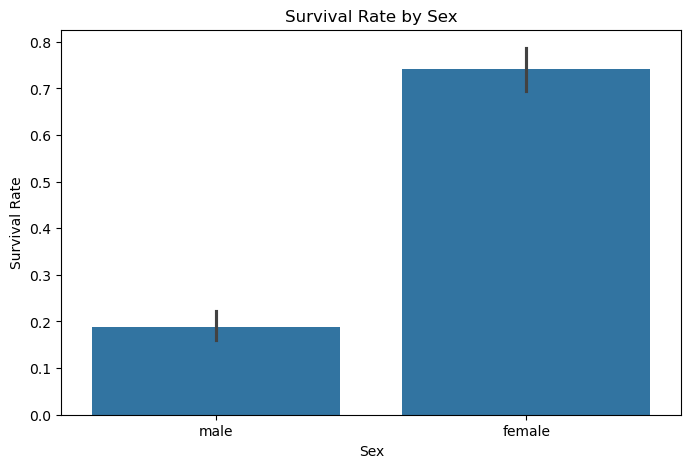

In [45]:
# Survival by Sex
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()


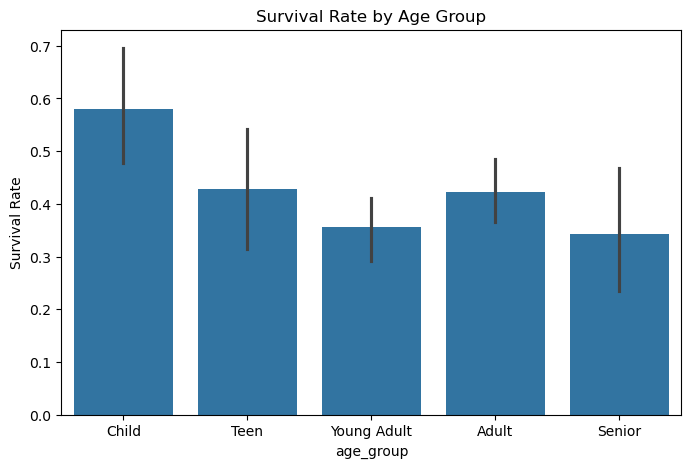

In [46]:
# Survival by Age Group
plt.figure(figsize=(8,5))
sns.barplot(x='age_group', y='Survived', data=titanic)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()


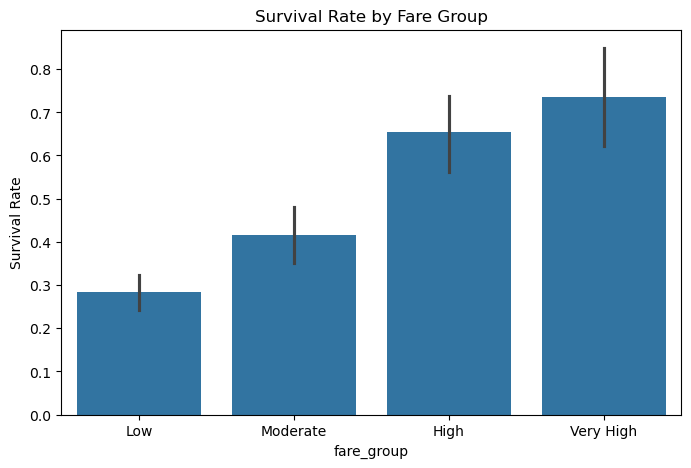

In [52]:
# Survival by Fare Group
plt.figure(figsize=(8,5))
sns.barplot(x='fare_group', y='Survived', data=titanic)
plt.title('Survival Rate by Fare Group')
plt.ylabel('Survival Rate')
plt.show()


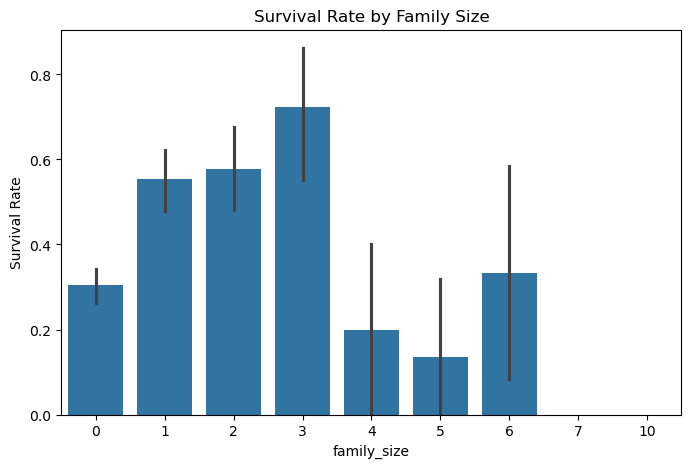

In [47]:
# Survival by Family Size
plt.figure(figsize=(8,5))
sns.barplot(x='family_size', y='Survived', data=titanic)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.show()


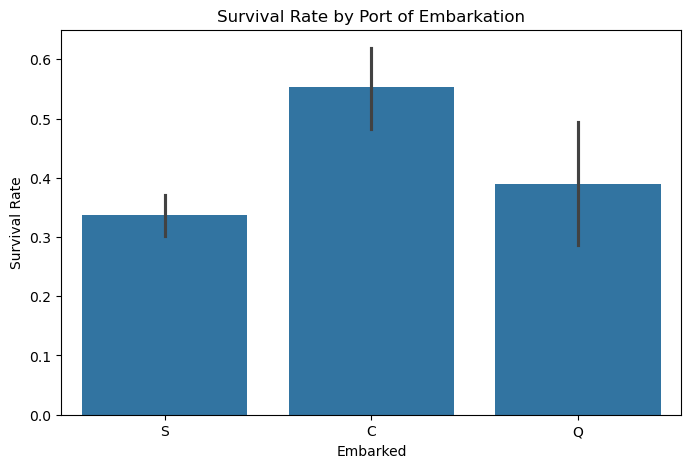

In [49]:
# Survival by Port of Embarkation
plt.figure(figsize=(8,5))
sns.barplot(x='Embarked', y='Survived', data=titanic)
plt.title('Survival Rate by Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()


In [55]:
# Most Likely to Survive: female, 1st class, age 20-40, embarked Cherbourg
most_likely = titanic.loc[
    (titanic['Sex'] == 'female') &
    (titanic['Pclass'] == 1) &
    (titanic['Age'] >= 20) & (titanic['Age'] <= 40) &
    (titanic['Embarked'] == 'C')
]

# Least Likely to Survive: male, 3rd class, age 20-40, embarked Southampton
least_likely = titanic.loc[
    (titanic['Sex'] == 'male') &
    (titanic['Pclass'] == 3) &
    (titanic['Age'] >= 20) & (titanic['Age'] <= 40) &
    (titanic['Embarked'] == 'S')
]

# Select one passenger for each profile
survivor = most_likely.iloc[0]
victim = least_likely.iloc[0]

print("Most Likely to Survive Passenger:", survivor['Name'])
print("Age:", survivor['Age'], "Fare:", survivor['Fare'], "Family Size:", survivor['family_size'])
print("\nLeast Likely to Survive Passenger:", victim['Name'])
print("Age:", victim['Age'], "Fare:", victim['Fare'], "Family Size:", victim['family_size'])


Most Likely to Survive Passenger: Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Age: 38.0 Fare: 71.2833 Family Size: 1

Least Likely to Survive Passenger: Braund, Mr. Owen Harris
Age: 22.0 Fare: 7.25 Family Size: 1


## Character Profile Reasoning

### Most Likely to Survive
- **Sex:** Female passengers were prioritized for lifeboats.  
- **Class:** 1st class had better access to lifeboats and deck.  
- **Age:** Adults aged 20–40 could handle evacuation but were still prioritized over older males.  
- **Port of Embarkation:** Cherbourg passengers were mainly 1st class.  
- **Family Size:** Moderate family size could aid survival due to assistance from companions.  
- **Fare:** Higher fare correlates with 1st class.

### Least Likely to Survive
- **Sex:** Males were less likely to be allowed in lifeboats.  
- **Class:** 3rd class passengers had limited lifeboat access and were on lower decks.  
- **Age:** Adults aged 20–40 were not prioritized.  
- **Port of Embarkation:** Southampton had the largest 3rd-class population.  
- **Family Size:** Smaller families were often separated in the chaos.  
- **Fare:** Low fare corresponds to 3rd class.


## Real Passenger Facts

Here are interesting historical facts about the real passengers who fit our character profiles:


### Most Likely to Survive
- **Mrs. Cumings:** Born in Boston, Massachusetts on 31 December 1873. She was the youngest daughter of George A. Thayer (1848–1922), a storehouse keeper, and Ella Stetson Briggs (b. 1849).

### Least Likely to Survive
- **Mr. Owen Harris Braund:** Born at Pigsdon Farm, Week St Mary, Cornwall on 31 October 1889. He was the son of James Braund (farmer) and Elizabeth Braund (née Harris).
